In [ ]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import csr_matrix
import gensim
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
import csv

import sys

sys.path.append('../notebooks/Functions/')
from NewTextMiningProcesses import new_column_lemmatizer, new_column_stemmatizer, new_count_vectorize_data, new_tfidf_vectorize_data

In [2]:
df = pd.read_json("../data/Appliances.json", lines = True)
df = df.dropna(subset='reviewText')

with open('full_vocab_list.csv') as file:
    header_list_string = file.read().strip()
    header_list = header_list_string.split(',')

features = df['reviewText'].iloc[0:150000]
target = df['overall'].iloc[0:150000]

lemmed_features = new_column_lemmatizer(features)

vectored_features = new_count_vectorize_data(lemmed_features)


In [3]:
# best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1)
regressor = LinearRegression()

rfecv = RFECV(estimator=regressor, step=100, cv=StratifiedKFold(3), scoring='neg_mean_squared_error')

rfecv.fit(vectored_features, target)

Fitting estimator with 28822 features.
Fitting estimator with 28722 features.
Fitting estimator with 28622 features.
Fitting estimator with 28522 features.
Fitting estimator with 28422 features.
Fitting estimator with 28322 features.
Fitting estimator with 28222 features.
Fitting estimator with 28122 features.
Fitting estimator with 28022 features.
Fitting estimator with 27922 features.
Fitting estimator with 27822 features.
Fitting estimator with 27722 features.
Fitting estimator with 27622 features.
Fitting estimator with 27522 features.
Fitting estimator with 27422 features.
Fitting estimator with 27322 features.
Fitting estimator with 27222 features.
Fitting estimator with 27122 features.
Fitting estimator with 27022 features.
Fitting estimator with 26922 features.
Fitting estimator with 26822 features.
Fitting estimator with 26722 features.
Fitting estimator with 26622 features.
Fitting estimator with 26522 features.
Fitting estimator with 26422 features.
Fitting estimator with 26

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LinearRegression(), step=100, verbose=2)

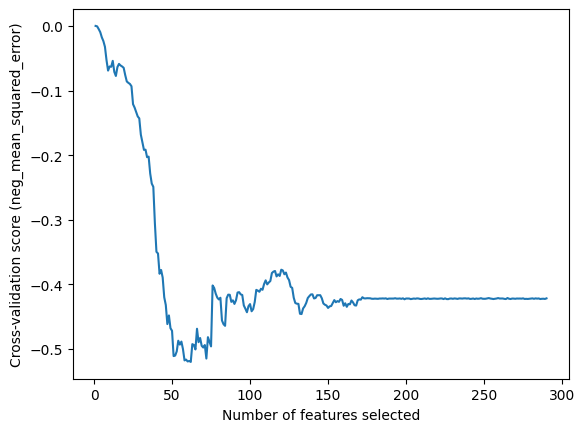

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [5]:
rankings = pd.DataFrame({"Ranking": rfecv.ranking_, "Feature": header_list})
rankings = rankings.sort_values(by="Ranking")
ranked_importance_df = rankings[rankings["Ranking"] < 51].copy()
ranked_importance01 = ranked_importance_df["Feature"].tolist()
len(ranked_importance01)

4822

In [19]:
rankings["Ranking"].max()

290

In [6]:
df = pd.read_json("../data/Appliances.json", lines = True)
df = df.dropna(subset='reviewText')

features02 = df['reviewText'].iloc[150000:300000]
target02 = df['overall'].iloc[150000:300000]

lemmed_features02 = new_column_stemmatizer(features02)

vectored_features02 = new_count_vectorize_data(lemmed_features02)

# Make a dataframe for machine learning
# total_features02 = pd.DataFrame(vectored_features02.toarray(), columns=vectorizer.get_feature_names_out())
total_features_sparse02 = pd.DataFrame.sparse.from_spmatrix(vectored_features02, columns=header_list)

# print(total_features02.shape)
# print(target02.shape)

In [7]:
regressor02 = LinearRegression()

rfecv02 = RFECV(estimator=regressor02, step=100, cv=StratifiedKFold(3), scoring='neg_mean_squared_error')

rfecv02.fit(vectored_features02, target02)

Fitting estimator with 28822 features.
Fitting estimator with 28722 features.
Fitting estimator with 28622 features.
Fitting estimator with 28522 features.
Fitting estimator with 28422 features.
Fitting estimator with 28322 features.
Fitting estimator with 28222 features.
Fitting estimator with 28122 features.
Fitting estimator with 28022 features.
Fitting estimator with 27922 features.
Fitting estimator with 27822 features.
Fitting estimator with 27722 features.
Fitting estimator with 27622 features.
Fitting estimator with 27522 features.
Fitting estimator with 27422 features.
Fitting estimator with 27322 features.
Fitting estimator with 27222 features.
Fitting estimator with 27122 features.
Fitting estimator with 27022 features.
Fitting estimator with 26922 features.
Fitting estimator with 26822 features.
Fitting estimator with 26722 features.
Fitting estimator with 26622 features.
Fitting estimator with 26522 features.
Fitting estimator with 26422 features.
Fitting estimator with 26

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LinearRegression(), step=100, verbose=2)

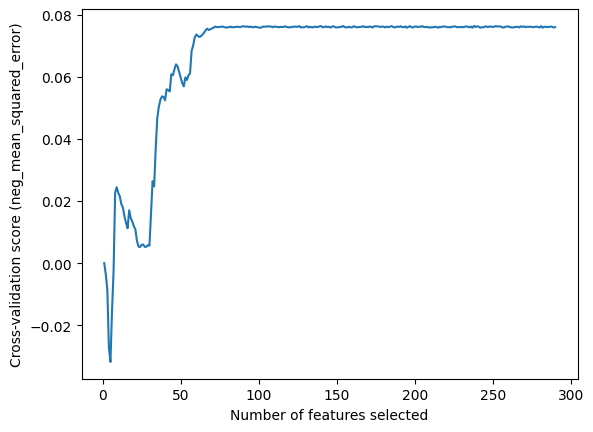

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv02.cv_results_['mean_test_score']) + 1), rfecv02.cv_results_['mean_test_score'])
plt.show()

In [26]:
rankings02 = pd.DataFrame({"Ranking": rfecv02.ranking_, "Feature": header_list})
rankings02 = rankings02.sort_values(by="Ranking")
ranked02_importance_df = rankings02[rankings02["Ranking"] < 3].copy()
ranked_importance02 = ranked02_importance_df["Feature"].tolist()
len(ranked_importance02)

23722

In [20]:
rankings02["Ranking"].max()

53

In [10]:
df = pd.read_json("../data/Appliances.json", lines = True)
df = df.dropna(subset='reviewText')

features03 = df['reviewText'].iloc[300000:450000]
target03 = df['overall'].iloc[300000:450000]

lemmed_features03 = new_column_stemmatizer(features03)

vectored_features03 = new_count_vectorize_data(lemmed_features03)

# Make a dataframe for machine learning
# total_features03 = pd.DataFrame(vectored_features03.toarray(), columns=vectorizer.get_feature_names_out())
total_features_sparse03 = pd.DataFrame.sparse.from_spmatrix(vectored_features03, columns=header_list)

# print(total_features03.shape)
# print(target03.shape)

In [11]:
regressor03 = LinearRegression()

rfecv03 = RFECV(estimator=regressor03, step=100, cv=StratifiedKFold(3), scoring='neg_mean_squared_error')

rfecv03.fit(vectored_features03, target03)

Fitting estimator with 28822 features.
Fitting estimator with 28722 features.
Fitting estimator with 28622 features.
Fitting estimator with 28522 features.
Fitting estimator with 28422 features.
Fitting estimator with 28322 features.
Fitting estimator with 28222 features.
Fitting estimator with 28122 features.
Fitting estimator with 28022 features.
Fitting estimator with 27922 features.
Fitting estimator with 27822 features.
Fitting estimator with 27722 features.
Fitting estimator with 27622 features.
Fitting estimator with 27522 features.
Fitting estimator with 27422 features.
Fitting estimator with 27322 features.
Fitting estimator with 27222 features.
Fitting estimator with 27122 features.
Fitting estimator with 27022 features.
Fitting estimator with 26922 features.
Fitting estimator with 26822 features.
Fitting estimator with 26722 features.
Fitting estimator with 26622 features.
Fitting estimator with 26522 features.
Fitting estimator with 26422 features.
Fitting estimator with 26

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LinearRegression(), step=100, verbose=2)

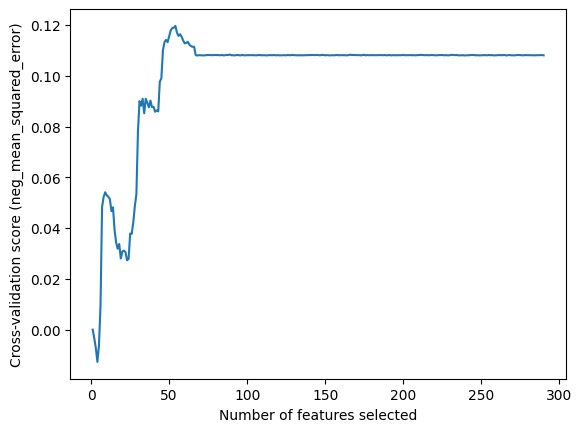

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv03.cv_results_['mean_test_score']) + 1), rfecv03.cv_results_['mean_test_score'])
plt.show()

In [28]:
rankings03 = pd.DataFrame({"Ranking": rfecv03.ranking_, "Feature": header_list})
rankings03 = rankings03.sort_values(by="Ranking")
ranked03_importance_df = rankings03[rankings03["Ranking"] < 51].copy()
ranked_importance03 = ranked03_importance_df["Feature"].tolist()
len(ranked_importance03)

9122

In [27]:
rankings03["Ranking"].max()

237

In [14]:
df = pd.read_json("../data/Appliances.json", lines = True)
df = df.dropna(subset='reviewText')

features04 = df['reviewText'].iloc[450000:]
target04 = df['overall'].iloc[450000:]

lemmed_features04 = new_column_stemmatizer(features04)

vectored_features04 = new_count_vectorize_data(lemmed_features04)

# Make a dataframe for machine learning
# total_features04 = pd.DataFrame(vectored_features04.toarray(), columns=vectorizer.get_feature_names_out())

# print(total_features04.shape)
# print(target04.shape)

In [30]:
regressor04 = LinearRegression()

rfecv04 = RFECV(estimator=regressor04, step=100, cv=StratifiedKFold(3))

rfecv04.fit(vectored_features04, target04)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LinearRegression(), step=100)

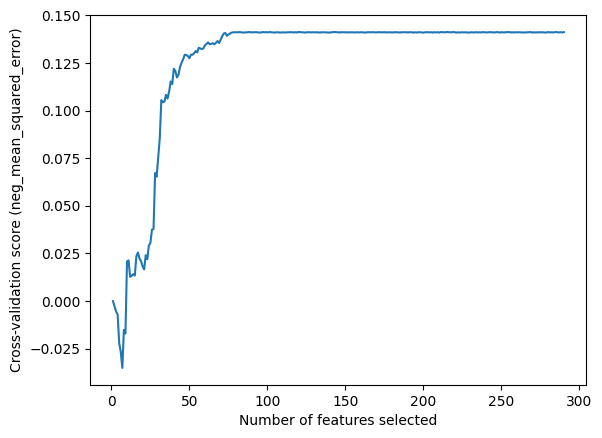

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv04.cv_results_['mean_test_score']) + 1), rfecv04.cv_results_['mean_test_score'])
plt.show()

In [34]:
rankings04 = pd.DataFrame({"Ranking": rfecv04.ranking_, "Feature": header_list})
rankings04 = rankings04.sort_values(by="Ranking")
ranked04_importance_df = rankings04[rankings04["Ranking"] < 31].copy()
ranked_importance04 = ranked04_importance_df["Feature"].tolist()
len(ranked_importance04)

17022

In [33]:
rankings04["Ranking"].max()

148

In [35]:
total_importance = []
total_importance.extend(ranked_importance01)
total_importance.extend(ranked_importance02)
total_importance.extend(ranked_importance03)
total_importance.extend(ranked_importance04)

total_importance = list(set(total_importance))

print(len(total_importance))

25929


In [ ]:
df = pd.read_json("../data/Appliances.json", lines = True)
df = df.dropna(subset='reviewText')

features_full_imp = df['reviewText']
target_full_imp = df['overall']

lemmed_features_full_imp = new_column_stemmatizer(features_full_imp)

vectored_features_full_imp = new_count_vectorize_data(lemmed_features_full_imp)

In [ ]:
regressor_full_imp = LinearRegression()

rfecv_full_imp = RFECV(estimator=regressor_full_imp, step=100, cv=StratifiedKFold(3), verbose=2)

rfecv_full_imp.fit(vectored_features_full_imp, target_full_imp)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(1, len(rfecv_full_imp.cv_results_['mean_test_score']) + 1), rfecv_full_imp.cv_results_['mean_test_score'])
plt.show()

In [ ]:
rankings_full_imp = pd.DataFrame({"Ranking": rfecv_full_imp.ranking_, "Feature": header_list})
rankings_full_imp = rankings_full_imp.sort_values(by="Ranking")
ranked_full_importance_df = rankings_full_imp[rankings_full_imp["Ranking"] < 51].copy()
ranked_importance_full = ranked_full_importance_df["Feature"].tolist()
len(ranked_importance_full)